In [1]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [9]:
#load data
df = pd.read_csv('medical_clean.csv',encoding='latin-1')

In [14]:
#drop complicating variables
df = df.drop(['City'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['County'], axis=1)
df = df.drop(['Zip'], axis=1)
df = df.drop(['TimeZone'], axis=1)
df = df.drop(['Job'], axis=1)
df = df.drop(['Lng'], axis=1)
df = df.drop(['Lat'], axis=1)
df = df.drop(['Item1'], axis=1)
df = df.drop(['Item2'], axis=1)
df = df.drop(['Item3'], axis=1)
df = df.drop(['Item4'], axis=1)
df = df.drop(['Item5'], axis=1)
df = df.drop(['Item6'], axis=1)
df = df.drop(['Item7'], axis=1)
df = df.drop(['Item8'], axis=1)
df = df.drop(['Services'], axis=1)


In [15]:
#transform boolean data 
Booleate = pd.get_dummies(df[['Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Reflux_esophagitis', 'Asthma', 'HighBlood', 'Overweight','ReAdmis','Soft_drink','Stroke','Anxiety', 'Allergic_rhinitis']])

df = pd.concat((df,Booleate), axis=1)

df= df.drop(['Arthritis'], axis=1)
df= df.drop(['Diabetes'], axis=1)
df= df.drop(['Hyperlipidemia'], axis=1)
df = df.drop(['BackPain'], axis=1)
df = df.drop(['Reflux_esophagitis'], axis=1)
df = df.drop(['Asthma'], axis=1)
df = df.drop(['HighBlood'], axis=1)
df = df.drop(['Overweight'], axis=1)
df = df.drop(['ReAdmis'], axis=1)
df = df.drop(['Soft_drink'], axis=1)
df = df.drop(['Stroke'], axis=1)
df = df.drop(['Anxiety'], axis=1)
df = df.drop(['Allergic_rhinitis'], axis=1)
df = df.drop(['Arthritis_No'], axis=1)
df = df.drop(['Diabetes_No'], axis=1)
df = df.drop(['Hyperlipidemia_No'], axis=1)
df = df.drop(['BackPain_No'], axis=1)
df = df.drop(['Reflux_esophagitis_No'], axis=1)
df = df.drop(['Asthma_No'], axis=1)
df = df.drop(['HighBlood_No'], axis=1)
df = df.drop(['Overweight_No'], axis=1)
df = df.drop(['ReAdmis_No'], axis=1)
df = df.drop(['Soft_drink_No'], axis=1)
df = df.drop(['Stroke_No'], axis=1)
df = df.drop(['Anxiety_No'], axis=1)
df = df.drop(['Allergic_rhinitis_No'], axis=1)

df = df.rename(columns={"Arthritis_Yes":"Arthritis"})
df = df.rename(columns={"Diabetes_Yes":"Diabetes"})
df = df.rename(columns={"Hyperlipidemia_Yes":"Hyperlipidemia"})
df = df.rename(columns={"BackPain_Yes":"BackPain"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"HighBlood_Yes":"HighBlood"})
df = df.rename(columns={"Overweight_Yes":"Overweight"})
df = df.rename(columns={"ReAdmis_Yes":"ReAdmis"})
df = df.rename(columns={"Soft_drink_Yes":"Soft_drink"})
df = df.rename(columns={"Stroke_Yes":"Stroke"})
df = df.rename(columns={"Anxiety_Yes":"Anxiety"})
df = df.rename(columns={"Allergic_rhinitis_Yes":"Allergic_rhinitis"})

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Area                10000 non-null  object 
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   Marital             10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Initial_admin       10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Initial_days        10000 non-null  float64
 14  TotalCharge         10000 non-null  float64
 15  Additional_charges  10000 non-null  float64
 16  Arthr

In [16]:
# create dummy variables 
dummies= pd.get_dummies(df[["Area","Marital","Gender","Initial_admin","Complication_risk",]])
df = pd.concat([df, dummies], axis=1)

df = df.drop(['Area'], axis=1)
df = df.drop(['Marital'], axis=1)
df = df.drop(['Gender'], axis=1)
df = df.drop(['Initial_admin'], axis=1)
df = df.drop(['Complication_risk'], axis=1)


In [17]:
#drop k-1 dummy variables
df = df.drop(['Area_Rural'], axis=1)
df = df.drop(['Marital_Never Married'], axis=1)
df = df.drop(['Gender_Female'], axis=1)
df = df.drop(['Initial_admin_Elective Admission'], axis=1)
df = df.drop(['Complication_risk_Low'], axis=1)



In [18]:
# transform variables
df['Population'] = df['Population'].astype(float)
df['Children'] = df['Children'].astype(float)
df['Age'] = df['Age'].astype(float)
df['Doc_visits'] = df['Doc_visits'].astype(float)
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(float)
df['vitD_supp'] = df['vitD_supp'].astype(float)
df['Area_Suburban'] = df['Area_Suburban'].astype(float)
df['Area_Urban'] = df['Area_Urban'].astype(float)
df['Marital_Divorced'] = df['Marital_Divorced'].astype(float)
df['Marital_Married'] = df['Marital_Married'].astype(float)
df['Marital_Separated'] = df['Marital_Separated'].astype(float)
df['Marital_Widowed'] = df['Marital_Widowed'].astype(float)
df['Gender_Male'] = df['Gender_Male'].astype(float)
df['Gender_Nonbinary'] = df['Gender_Nonbinary'].astype(float)
df['Initial_admin_Emergency Admission'] = df['Initial_admin_Emergency Admission'].astype(float)
df['Initial_admin_Observation Admission'] = df['Initial_admin_Observation Admission'].astype(float)
df['Complication_risk_High'] = df['Complication_risk_High'].astype(float)
df['Complication_risk_Medium'] = df['Complication_risk_Medium'].astype(float)

df['HighBlood'] = df['HighBlood'].astype('float')
df['Stroke'] = df['Stroke'].astype('float')
df['Overweight'] = df['Overweight'].astype('float')
df['Arthritis'] = df['Arthritis'].astype('float')
df['Diabetes'] = df['Diabetes'].astype('float')
df['Hyperlipidemia'] = df['Hyperlipidemia'].astype('float')
df['BackPain'] = df['BackPain'].astype('float')
df['Anxiety'] = df['Anxiety'].astype('float')
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype('float')
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].astype('float')
df['Asthma'] = df['Asthma'].astype('float')
df['ReAdmis'] = df['ReAdmis'].astype('float')
df['Soft_drink'] = df['Soft_drink'].astype('float')
df['Stroke'] = df['Stroke'].astype('float')
df['Anxiety'] = df['Anxiety'].astype('float')
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype('float')


In [19]:
# Calculate the required sample size
978=(10*40) / .409


SyntaxError: cannot assign to literal (205283968.py, line 2)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>],
       [<AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'vitD_supp'}>,
        <AxesSubplot:title={'center':'Initial_days'}>,
        <AxesSubplot:title={'center':'TotalCharge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Arthritis'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyperlipidemia'}>,
        <AxesSubplot:title={'center':'BackPain'}>,
        <AxesSubplot:title={'center':'Reflux_esophagitis'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'HighBlood'}>],
       [<AxesSubplot:title={'center':

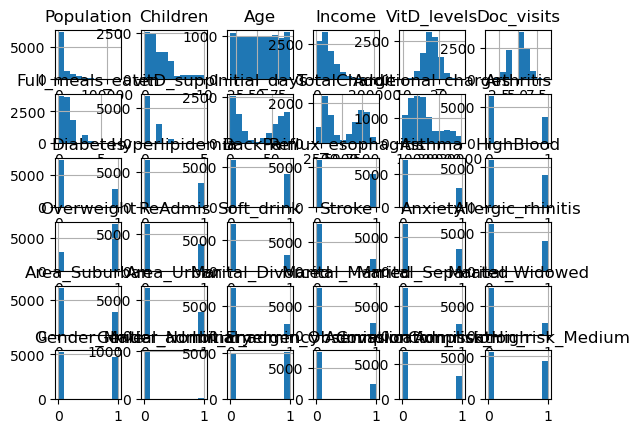

In [20]:
#univariate visualization
df.hist()


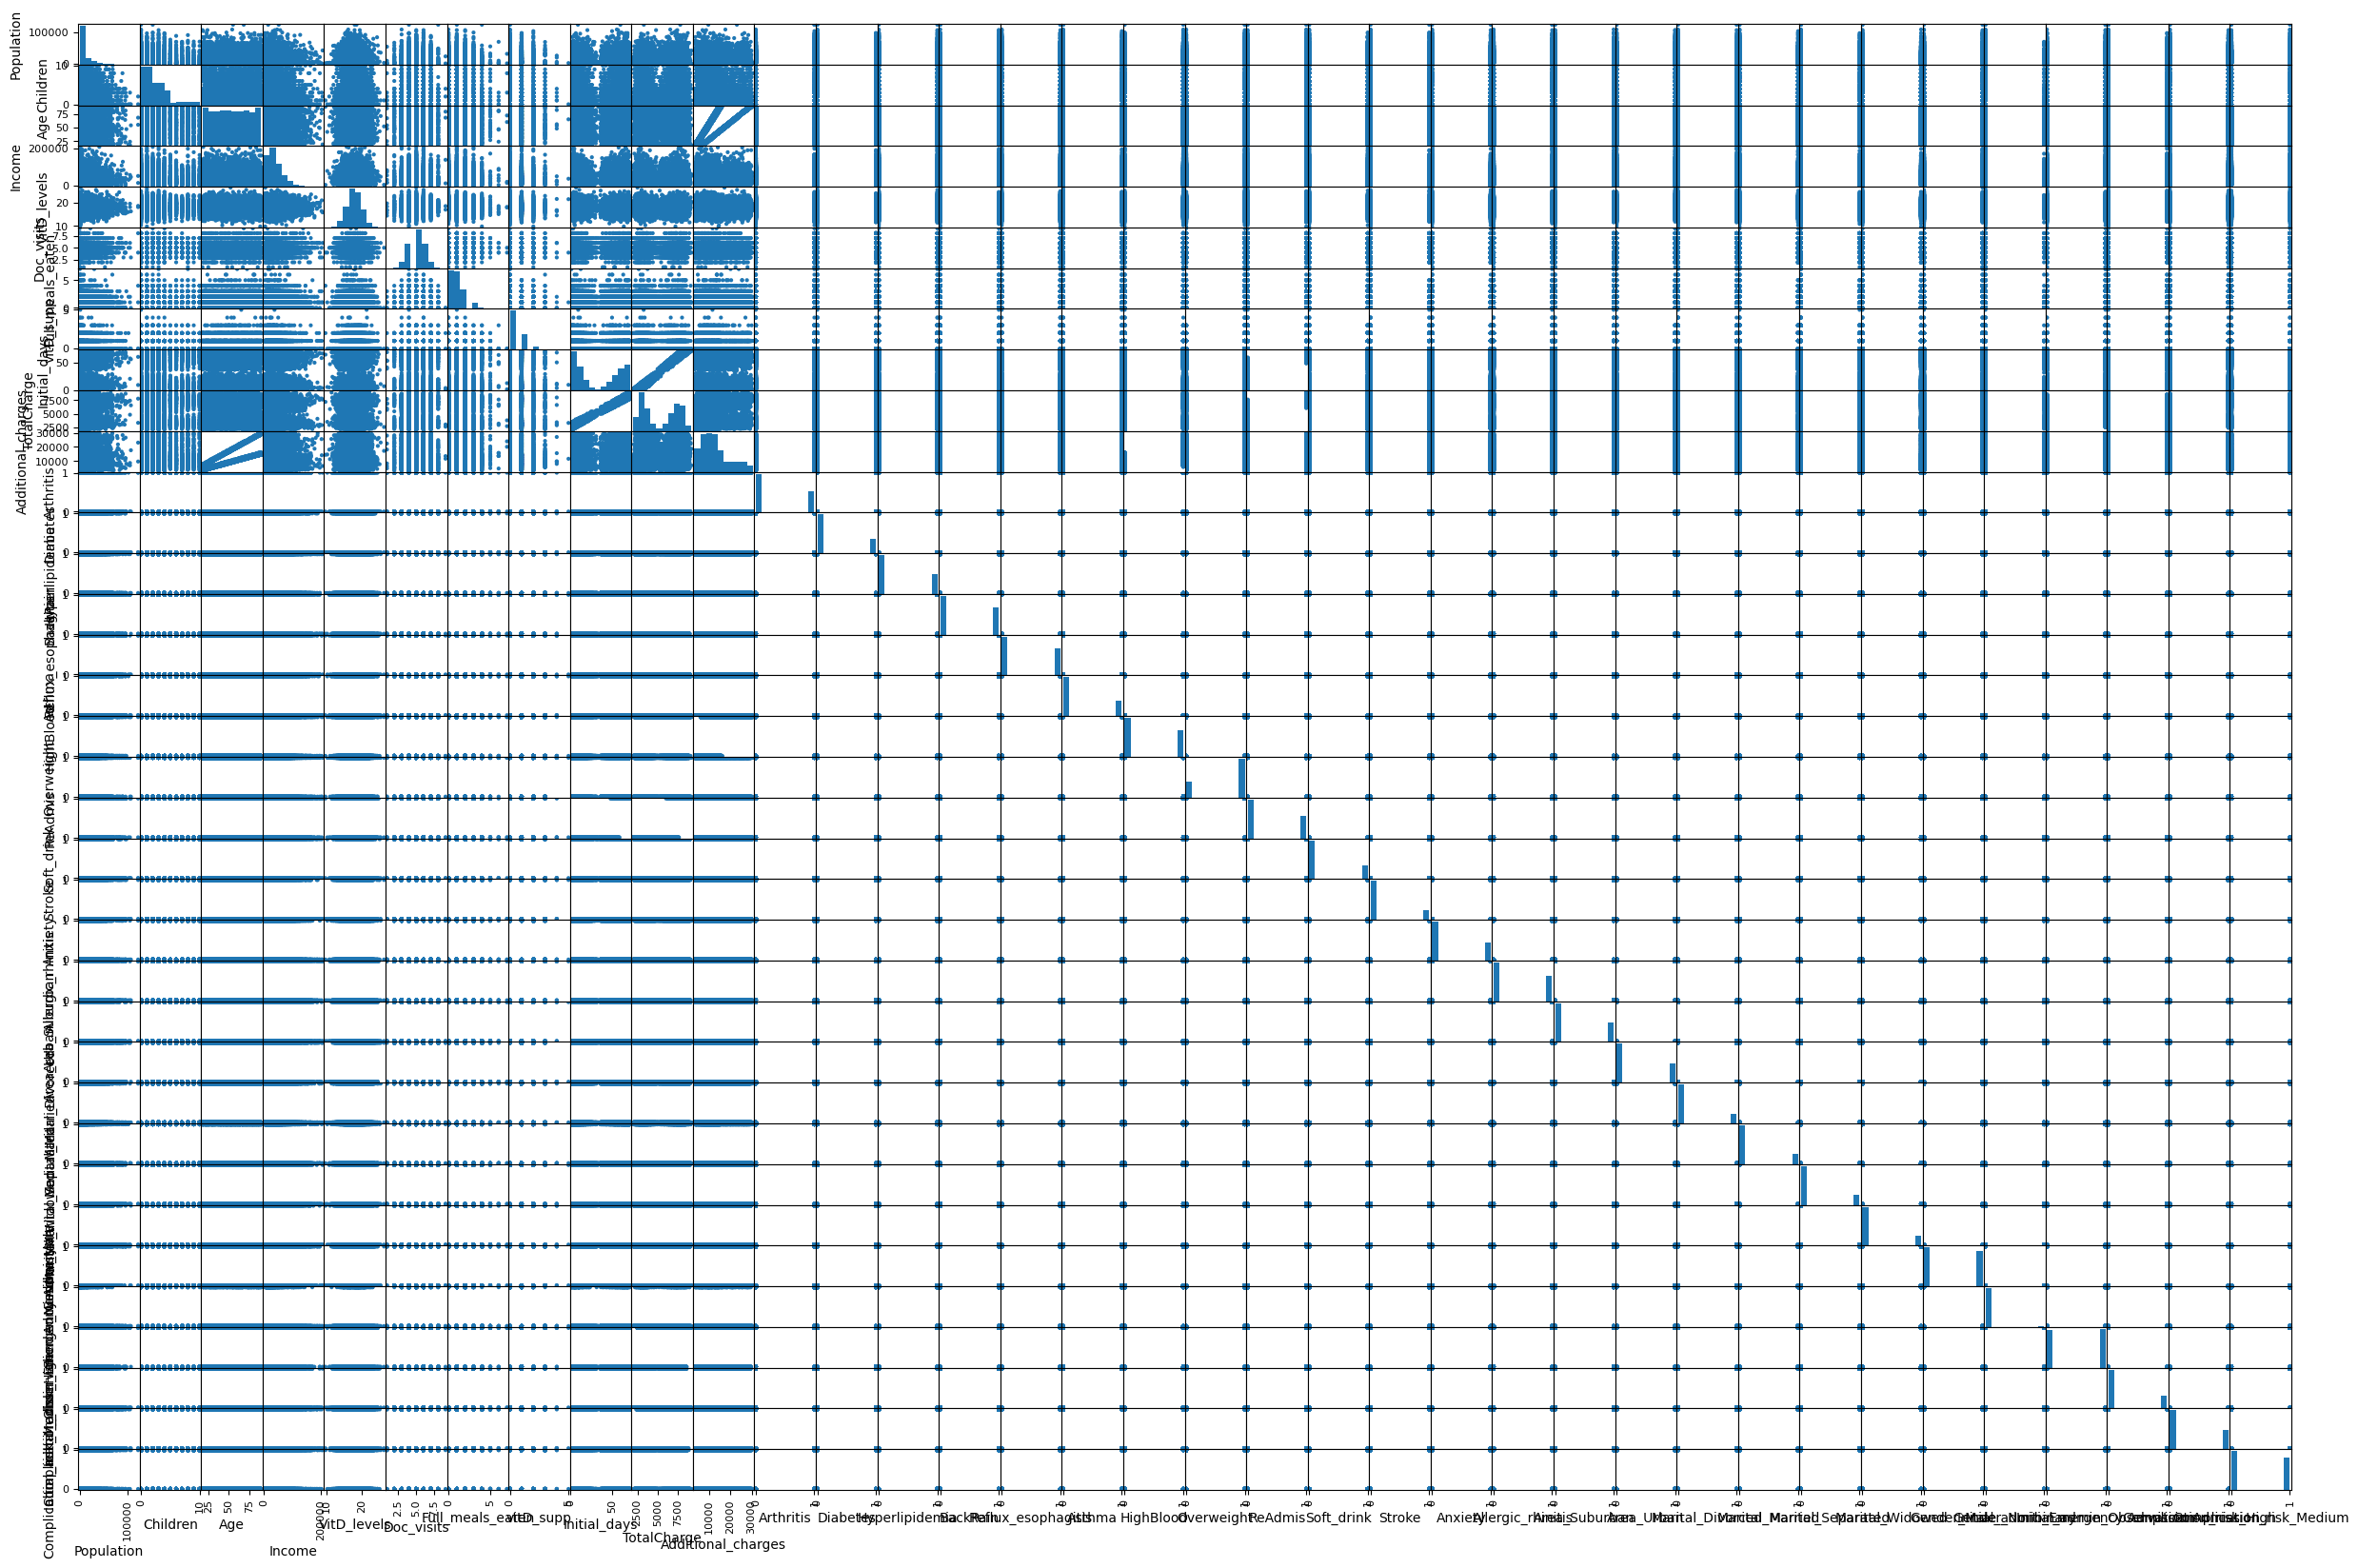

In [21]:
#bivariate visualization 
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

plt.show()



In [22]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#perform logistic regression
x= df.drop('HighBlood', axis =1)
y= df['HighBlood']

model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [23]:
# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HighBlood   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              3717.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:08:19   Log-Likelihood:                          3496.2
No. Observations:               10000   AIC:                                     -6922.
Df Residuals:                    9965   BIC:                                     -6670.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Population                          -1.127e-07   1.15e-07     -0.976      0.329   -3.39e-07    1.14e-07
Children                               -0.0020      0.001     -2.499      0.012      -0.004      -0.000
Age                                    -0.0222      0.000   -188.339      0.000      -0.022      -0.022
Income                              -1.098e-07      6e-08     -1.830      0.067   -2.27e-07    7.79e-09
VitD_levels                            -0.0064      0.001     -7.572      0.000      -0.008      -0.005
Doc_visits                             -0.0055      0.002     -3.359      0.001      -0.009      -0.002
Full_meals_eaten                       -0.0018      0.002     -1.063      0.288      -0.005       0.002
vitD_supp                              -0.0006      0.003     -0.209      0.834      -0.006       0.005
Initial_days                           -0.0249      0.001    -28.281      0.000      -0.027      -0.023
TotalCharge                             0.0003   1.04e-05     29.051      0.000       0.000       0.000
Additional_charges                   9.769e-05   3.94e-07    248.032      0.000    9.69e-05    9.85e-05
Arthritis                              -0.0178      0.004     -4.817      0.000      -0.025      -0.011
Diabetes                               -0.0320      0.004     -8.057      0.000      -0.040      -0.024
Hyperlipidemia                         -0.0336      0.004     -8.782      0.000      -0.041      -0.026
BackPain                               -0.0251      0.004     -6.886      0.000      -0.032      -0.018
Reflux_esophagitis                     -0.0240      0.004     -6.707      0.000      -0.031      -0.017
Asthma                                 -0.0068      0.004     -1.812      0.070      -0.014       0.001
Overweight                             -0.0060      0.004     -1.591      0.112      -0.013       0.001
ReAdmis                                -0.0001      0.007     -0.021      0.983      -0.013       0.013
Soft_drink                             -0.0052      0.004     -1.328      0.184      -0.013       0.002
Stroke                                 -0.0361      0.004     -8.427      0.000      -0.044      -0.028
Anxiety                                -0.0303      0.004     -7.937      0.000      -0.038      -0.023
Allergic_rhinitis                      -0.0197      0.004     -5.469      0.000      -0.027      -0.013
Area_Suburban                           0.0013      0.004      0.307      0.759      -0.007       0.009
Area_Urban                              0.0051      0.004      1.217      0.224      -0.003       0.013
Marital_Divorced                       -0.0009      0.005     -0.170    

In [28]:
#create new data frame with statistically significant pvalues
df = df[['Children',
         'Age',
         'VitD_levels',
         'Doc_visits',
         'Age',
         'Initial_days',
         'TotalCharge',
         'Additional_charges',
         'Arthritis',
        'Diabetes',
        'Hyperlipidemia',
        'BackPain',
        'Reflux_esophagitis',
        'HighBlood',
        'Stroke',
        'Anxiety',
        'Allergic_rhinitis',
        'Gender_Male',
        'Initial_admin_Emergency Admission',
        'Complication_risk_High',
        'Complication_risk_Medium',]]



,Children,Age,VitD_levels,Doc_visits,Age,Initial_days,TotalCharge,Additional_charges,Arthritis,Diabetes,...,BackPain,Reflux_esophagitis,HighBlood,Stroke,Anxiety,Allergic_rhinitis,Gender_Male,Initial_admin_Emergency Admission,Complication_risk_High,Complication_risk_Medium
Children,1.000000,0.009836,0.009487,-0.002292,0.009836,0.022467,0.024100,0.013548,0.007871,0.022479,...,-0.007785,0.005639,0.001923,0.005123,0.008362,-0.019207,-0.004113,0.009168,0.005931,-0.005856
Age,0.009836,1.000000,0.010315,0.006898,1.000000,0.016264,0.016876,0.716854,0.007110,0.003694,...,0.021081,-0.019609,0.007147,0.012035,0.006130,0.012092,-0.016297,-0.004538,0.005404,-0.006021
VitD_levels,0.009487,0.010315,1.000000,0.010210,0.010315,-0.003642,-0.001403,0.008290,0.000075,-0.025834,...,-0.009080,-0.014419,0.005660,0.006721,0.007875,-0.005035,-0.013205,0.027322,-0.002521,0.010341
Doc_visits,-0.002292,0.006898,0.010210,1.000000,0.006898,-0.006754,-0.005043,0.008072,-0.000719,0.012781,...,0.008514,-0.005330,0.008967,-0.002230,-0.001684,0.002920,-0.006159,0.003686,0.013776,-0.008091
Age,0.009836,1.000000,0.010315,0.006898,1.000000,0.016264,0.016876,0.716854,0.007110,0.003694,...,0.021081,-0.019609,0.007147,0.012035,0.006130,0.012092,-0.016297,-0.004538,0.005404,-0.006021
Initial_days,0.022467,0.016264,-0.003642,-0.006754,0.016264,1.000000,0.987640,0.004409,0.018907,-0.002411,...,0.017344,0.012237,-0.006333,-0.002043,0.011908,0.003635,0.006704,-0.011349,-0.005616,-0.010313
TotalCharge,0.024100,0.016876,-0.001403,-0.005043,0.016876,0.987640,1.000000,0.029256,0.032932,0.011524,...,0.035828,0.026284,0.019910,-0.003694,0.031199,0.018919,0.004748,0.106985,0.084038,-0.068781
Additional_charges,0.013548,0.716854,0.008290,0.008072,0.716854,0.004409,0.029256,1.000000,0.004788,0.002450,...,0.014245,-0.011405,0.654316,0.035140,0.011666,0.016154,0.002757,0.034762,0.040444,-0.009418
Arthritis,0.007871,0.007110,0.000075,-0.000719,0.007110,0.018907,0.032932,0.004788,1.000000,0.009097,...,-0.018804,0.014894,0.007314,-0.018438,0.012045,0.008748,0.007903,-0.000603,-0.020832,0.017453
Diabetes,0.022479,0.003694,-0.025834,0.012781,0.003694,-0.002411,0.011524,0.002450,0.009097,1.000000,...,-0.013405,-0.007816,-0.005858,0.005792,-0.002529,0.005486,-0.001562,-0.008266,-0.004473,-0.001241


<AxesSubplot:>

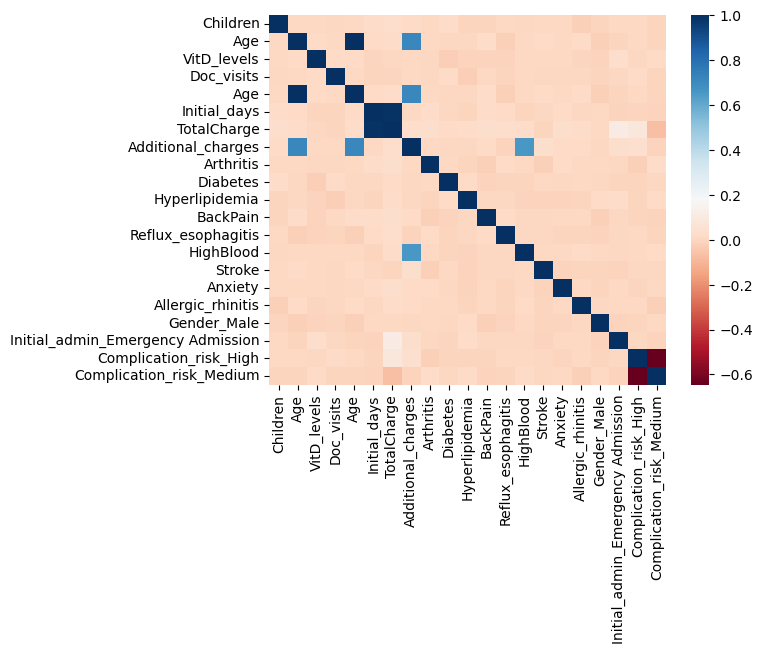

In [29]:
# test for multicolenearity 
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')



In [30]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                5.031955e+13
Children                             1.002431e+00
Age                                           inf
VitD_levels                          1.002925e+00
Doc_visits                           1.001691e+00
Age                                           inf
Initial_days                         6.772330e+13
TotalCharge                          6.928615e+13
Additional_charges                   1.629042e+01
Arthritis                            1.736612e+10
Diabetes                             1.642472e+10
Hyperlipidemia                       2.883826e+10
BackPain                             2.564174e+10
Reflux_esophagitis                   1.261652e+10
HighBlood                            4.454357e+10
Stroke                               1.009136e+00
Anxiety                              2.362742e+10
Allergic_rhinitis                    1.280021e+10
Gender_Male                          1.003958e+00
Initial_admin_Emergency Admission    9.583146e+11


In [31]:
#drop Age
df_after = df.drop(['Age'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                5.031955e+13
Children                             1.002211e+00
VitD_levels                          1.002622e+00
Doc_visits                           1.001500e+00
Initial_days                         6.772330e+13
TotalCharge                          6.928615e+13
Additional_charges                   1.761696e+00
Arthritis                            1.736294e+10
Diabetes                             1.642172e+10
Hyperlipidemia                       2.883300e+10
BackPain                             2.563707e+10
Reflux_esophagitis                   1.261422e+10
HighBlood                            4.453542e+10
Stroke                               1.002742e+00
Anxiety                              2.362315e+10
Allergic_rhinitis                    1.279786e+10
Gender_Male                          1.001299e+00
Initial_admin_Emergency Admission    9.581108e+11
Complication_risk_High               5.568937e+11
Complication_risk_Medium             1.717737e+00


In [32]:
#drop Initial_admin_Emergency Admission
df_after = df_after.drop(['Initial_admin_Emergency Admission'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                       181.391748
Children                      1.002138
VitD_levels                   1.002546
Doc_visits                    1.001482
Initial_days                 71.912748
TotalCharge                  72.753050
Additional_charges            1.761374
Arthritis                     1.020361
Diabetes                      1.017119
Hyperlipidemia                1.039347
BackPain                      1.029126
Reflux_esophagitis            1.015079
HighBlood                     1.782175
Stroke                        1.002729
Anxiety                       1.028566
Allergic_rhinitis             1.016145
Gender_Male                   1.001299
Complication_risk_High        2.288472
Complication_risk_Medium      1.717549
dtype: float64

In [33]:
#drop Initial_days
df_after = df_after.drop(['Initial_days'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                       121.485191
Children                      1.002102
VitD_levels                   1.001805
Doc_visits                    1.001462
TotalCharge                   1.013814
Additional_charges            1.757701
Arthritis                     1.003116
Diabetes                      1.002193
Hyperlipidemia                1.002322
BackPain                      1.003383
Reflux_esophagitis            1.002144
HighBlood                     1.751781
Stroke                        1.002605
Anxiety                       1.001988
Allergic_rhinitis             1.001654
Gender_Male                   1.001166
Complication_risk_High        1.723324
Complication_risk_Medium      1.717388
dtype: float64

In [34]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [39]:
x= df_after.drop('HighBlood', axis =1)
y= df_after['HighBlood']
model = LogisticRegression(solver= 'liblinear' , random_state=0)
model.fit(x,y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [40]:
# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HighBlood   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              1219.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:12:28   Log-Likelihood:                         -4303.1
No. Observations:               10000   AIC:                                      8638.
Df Residuals:                    9984   BIC:                                      8753.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Children                    -0.0023      0.002     -1.321      0.186      -0.006       0.001
VitD_levels                 -0.0086      0.001     -7.881      0.000      -0.011      -0.006
Doc_visits                  -0.0070      0.003     -2.171      0.030      -0.013      -0.001
TotalCharge              -1.424e-06   1.68e-06     -0.846      0.398   -4.72e-06    1.88e-06
Additional_charges        4.875e-05   5.64e-07     86.454      0.000    4.76e-05    4.99e-05
Arthritis                    0.0006      0.008      0.076      0.940      -0.015       0.016
Diabetes                    -0.0113      0.008     -1.352      0.176      -0.028       0.005
Hyperlipidemia              -0.0123      0.008     -1.566      0.117      -0.028       0.003
BackPain                    -0.0097      0.008     -1.289      0.197      -0.025       0.005
Reflux_esophagitis           0.0050      0.008      0.661      0.509      -0.010       0.020
Stroke                      -0.0210      0.009     -2.256      0.024      -0.039      -0.003
Anxiety                     -0.0019      0.008     -0.244      0.807      -0.018       0.014
Allergic_rhinitis           -0.0020      0.008     -0.265      0.791      -0.017       0.013
Gender_Male                 -0.0018      0.007     -0.249      0.804      -0.016       0.013
Complication_risk_High      -0.0158      0.010     -1.535      0.125      -0.036       0.004
Complication_risk_Medium     0.0070      0.010      0.720      0.472      -0.012       0.026
==============================================================================
Omnibus:                      893.495   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1102.710
Skew:                           0.797   Prob(JB):                    3.54e-240
Kurtosis:                       2.679   Cond. No.                     5.25e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:

#create confusion matrix 
from sklearn.metrics import confusion_matrix
model = LogisticRegression(solver= 'liblinear' , random_state=0)
model.fit(x,y)
y_pred=model.predict(x)
confusion_matrix(y, y_pred)



array([[5223,  687],
       [1301, 2789]])